<a href="https://colab.research.google.com/github/spencerlore/IS4487-Main/blob/main/Assignments/assignment_10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IS4487 Assignment 10: Classfication with Decision Trees**

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data
3. Fit a model
4. Test the accuracy of the model
6.  Use the model to predict on a new dataset (without the target)

<a href="https://colab.research.google.com/github/vandanara/UofUtah_IS4487/blob/main/Assignments/assignment_10_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case: AdviseInvest
You work on a small team of data analysts at AdviseInvest, a venture-backed startup. The Director of Sales at AdviseInvest has approached your team asking for help solving a staffing problem.

### The Company
The company's mission is to provide tools and support to help ordinary people gain control of their personal finances. The company leverages technology to provide affordable financial advice to a national client base.

Customers who reach AdviseInvest's website go through five steps:

- Open an account.
- Complete a customer profile form with basic information about their background and finances.
- Schedule a free phone conversation with a sales representative during a 1-hour window of time.
- Attend the free phone conversation.
- Buy a financial plan.
- There are three types of financial plans: Beginner, Intermediate, and Advanced. Each is sold at a different price, and there are varying degrees of personalization. After a customer purchases a financial plan, the customer is assigned a financial planner who helps determine the customer's goals and advises the customer on spending decisions.

### The Problem
Some customers are lost at each stage of the process. Steps 3 and 4 are particularly challenging because approximately 50% of those who schedule a phone conversation fail to pick up the call. This leads to inefficiencies from a staffing perspective.

AdviseInvest has 4 sales reps on staff during each particular 1-hour window. Each of the 4 reps is assigned 2 prospective customers per hour, which means that the company schedules a total of 8 phone calls per hour. The calls are outgoing: sales reps call customers who scheduled a phone conversation during that hour window.

Unfortunately, as noted above, many of the customers who scheduled a call do not answer. As a consequence, sales reps are often left underutilized. Moreover, they are underutilized unevenly. For example, it is possible that one sales rep will not do any sales calls during that hour, whereas another will be busy the entire hour with two calls. Sales reps have nothing to do when customers do not answer the scheduled phone call.

### AdviseInvest Data Dictionary


| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |

## **Task 1. Import libraries, Load the Data and Preview it**

1.1. Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib

1.2. Initial Data Understanding
- Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)

1.3. Preview the data
- Describe or profile the dataframe
- Look for any outliers, missing values, or duplicates (enough to describe it)

In [47]:
# 🔧 1.1. Add code here
# Data manipulation
import pandas as pd
import numpy as np

# Machine learning & preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns


In [48]:
# 🔧 1.2. Import the data
df = pd.read_csv('adviseinvest_historical_data.csv')
df.head()

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [49]:
 # 🔧 1.3. Preview the data

 # View a few rows
print(data.head())

 # View the datatypes
print(data.dtypes)

 # Describe the data
print(data.describe())


   answered  income female  age  job  num_dependents  rent  own_res  new_car  \
0         1   13520      0   23    0               1     1        0      0.0   
1         0   14780      0   22    2               1     0        1      0.0   
2         1   37570      0   62    2               1     0        0      1.0   
3         0   12450      0   33    2               1     0        1      0.0   
4         0   12400      0   48    1               2     0        0      1.0   

   chk_acct  sav_acct  num_accts  mobile  product  
0         0         2          0       1        2  
1         3         0          3       0        0  
2         3         0          4       0        4  
3         1         0          2       0        0  
4         2         1          4       0        0  
answered            int64
income              int64
female             object
age                 int64
job                 int64
num_dependents      int64
rent                int64
own_res             int64

## **Task 2. Data Preparation**

### **2.1. Data Cleanup**
2.1.1. Delete any obvious outliers

2.1.2. Remove any variables that are not relevant to our analysis (be sure not to delete too many variables, you may need them in the near future!)

2.1.3 Clean up any missing data or non-standardized data.

Save the data in a new datafram named "df_clean"


In [50]:
# 🔧 2.1.1. Delete outliers
# Create a copy of the original dataframe
df_clean = data.copy()

# Identify numeric columns
numeric_cols = df_clean.select_dtypes(include=['float64', 'int64']).columns

# Remove outliers using IQR
for col in numeric_cols:
    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]


In [51]:
# 🔧 2.1.2. Remove variables that are not helpful
# Example: drop columns that won't be used
columns_to_drop = ['CustomerID', 'TransactionID', 'Notes']  # replace with your actual irrelevant columns
df_clean = df_clean.drop(columns=columns_to_drop, errors='ignore')  # 'errors=ignore' avoids errors if a column isn't present


In [52]:
# 🔧 2.1.3. Cleanup any missing or non-standardized data
# Numeric columns
for col in df_clean.select_dtypes(include=['float64', 'int64']).columns:
    df_clean[col].fillna(df_clean[col].median(), inplace=True)

# Categorical columns
for col in df_clean.select_dtypes(include=['object']).columns:
    df_clean[col].fillna(df_clean[col].mode()[0], inplace=True)


/tmp/ipython-input-2771676954.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean[col].fillna(df_clean[col].median(), inplace=True)
/tmp/ipython-input-2771676954.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

### **2.2. Clean up the data types of features. Convert to int**

 2.2.1. Convert any variables that should be an integer into an integer

In [53]:
# 🔧 2.2.1. Convert variables to integer data type
int_columns = [
    'new_car'
]

for col in int_columns:
    df_clean[col] = df_clean[col].fillna(0).astype('int')

### **2.3. Clean up the data types of features. Convert to categorical**

2.3.1. Change the target, `answered` to yes/no and make it categorical

2.3.2. Find at least 8 variables that would be appropriate to convert to categories

In [54]:
# 🔧 2.3.1. Convert answered to categorical
# Convert target to categorical yes/no
df_clean['answered'] = df_clean['answered'].map({1: 'yes', 0: 'no'}).astype('category')


In [55]:
# 🔧 2.3.2. Convert categorical variables
categorical_cols = [
    'female',
    'job',
    'rent',
    'own_res',
    'chk_acct',
    'sav_acct',
    'mobile',
    'product'
]

for col in categorical_cols:
    df_clean[col] = df_clean[col].astype('category')

# Preview the updated data types
print(df_clean.dtypes)


answered          category
income               int64
female            category
age                  int64
job               category
num_dependents       int64
rent              category
own_res           category
new_car              int64
chk_acct          category
sav_acct          category
num_accts            int64
mobile            category
product           category
dtype: object


## **Task 3: Exploratory Data Analysis (EDA)**

### **3.1.-3.5. Draw charts**
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted



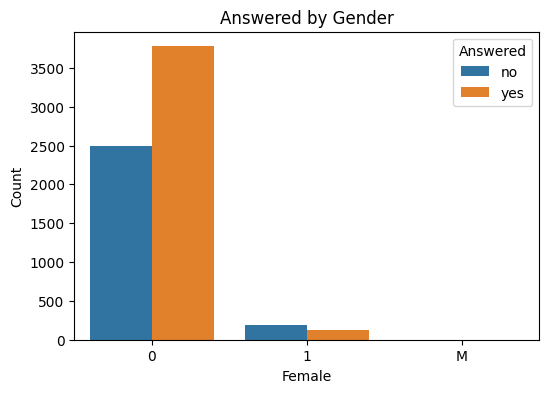

In [56]:
# 🔧3.1. Chart 1 Bar plot of target by gender
plt.figure(figsize=(6,4))
sns.countplot(x='female', hue='answered', data=df_clean)
plt.title('Answered by Gender')
plt.xlabel('Female')
plt.ylabel('Count')
plt.legend(title='Answered')
plt.show()

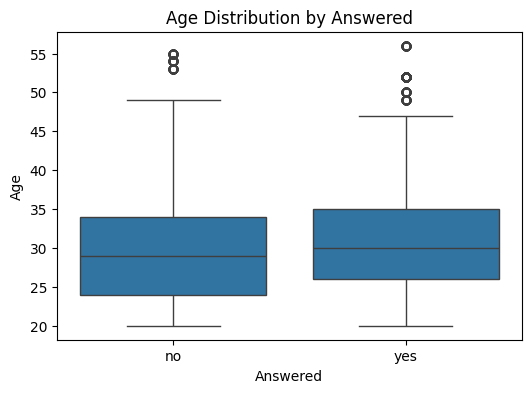

In [57]:
# 🔧3.2. Chart 1 Box plot of age by target
plt.figure(figsize=(6,4))
sns.boxplot(x='answered', y='age', data=df_clean)
plt.title('Age Distribution by Answered')
plt.xlabel('Answered')
plt.ylabel('Age')
plt.show()

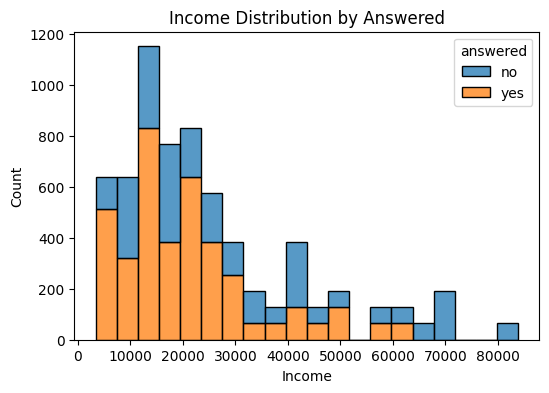

In [58]:
# 🔧3.3. Chart 1 Histogram of income by answered
plt.figure(figsize=(6,4))
sns.histplot(data=df_clean, x='income', hue='answered', multiple='stack', bins=20)
plt.title('Income Distribution by Answered')
plt.xlabel('Income')
plt.ylabel('Count')
plt.show()


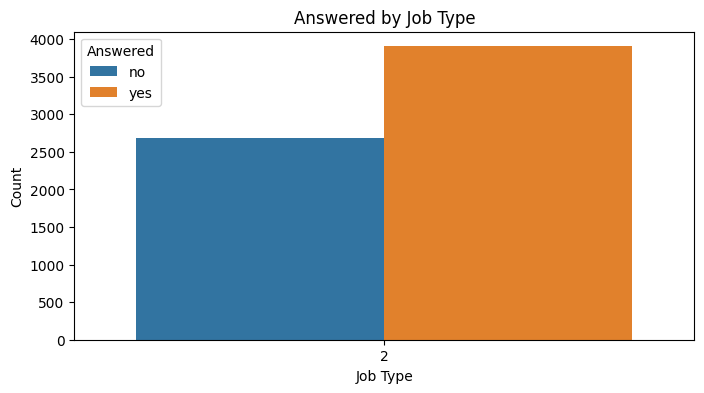

In [59]:
# 🔧3.4. Chart 1 Count plot of target by job type
plt.figure(figsize=(8,4))
sns.countplot(x='job', hue='answered', data=df_clean)
plt.title('Answered by Job Type')
plt.xlabel('Job Type')
plt.ylabel('Count')
plt.legend(title='Answered')
plt.show()

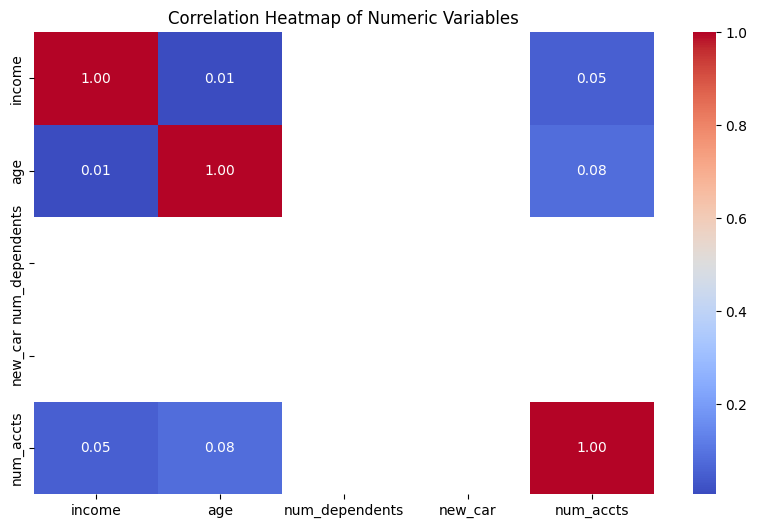

In [60]:
# 🔧3.5. Chart 1 Correlation heatmap
# Encode answered back to 0/1 temporarily for correlation
df_corr = df_clean.copy()
df_corr['answered'] = df_corr['answered'].map({'yes':1, 'no':0})

# Select only numeric columns for correlation calculation
numeric_df_corr = df_corr.select_dtypes(include=['number'])

plt.figure(figsize=(10,6))
sns.heatmap(numeric_df_corr.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Numeric Variables')
plt.show()

## **Task 4. Modeling**

### **4.1. Calculate the base probability of answering**

If we use no model at all, how good is our chance of predicting someone leaving?  
* Use a calculation to find the chances of someone leaving.

In [61]:
# 🔧 4.1. Get the default probability
base_prob = df_clean['answered'].value_counts(normalize=True)
print("Base probability of answering:\n", base_prob)

# Probability of answering 'yes'
p_yes = base_prob['yes']
print(f"\nChance of someone answering yes: {p_yes:.2f}")

Base probability of answering:
 answered
yes    0.592233
no     0.407767
Name: proportion, dtype: float64

Chance of someone answering yes: 0.59


### **4.2. Split the training and testing datasets**

Split `df_clean` using `train_test_split()` function
- all variables except answered should be in the `X` variable
- `answered` is in the `y` variable


In [62]:
# 🔧 4.2 Split data into training and testing sets
# Features (X) and target (y)
X = df_clean.drop(columns=['answered'])
y = df_clean['answered']

# Convert categorical features to numeric using one-hot encoding for the tree
X_encoded = pd.get_dummies(X, drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.3, random_state=42, stratify=y
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (4614, 16)
Testing set size: (1978, 16)


### **4.3. Create and Visualize a Decision Tree**
4.3.1. Use all available attributes (except those that were eliminated in step 3)
- As a baseline, you can try `criterion` = "entropy" and  `max_depth` = 4

4.3.2. Visualize the tree

In [63]:
# 🔧 4.3.1. Create a Decision Tree
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree
clf = DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=42)
clf.fit(X_train, y_train)

# Check feature importance
feat_imp = pd.Series(clf.feature_importances_, index=X_encoded.columns).sort_values(ascending=False)
print("Feature Importances:\n", feat_imp)

Feature Importances:
 product_1         0.299894
product_3         0.262524
product_4         0.234776
product_2         0.202805
income            0.000000
age               0.000000
num_dependents    0.000000
new_car           0.000000
chk_acct_1        0.000000
female_M          0.000000
female_1          0.000000
num_accts         0.000000
sav_acct_2        0.000000
sav_acct_1        0.000000
chk_acct_3        0.000000
chk_acct_2        0.000000
dtype: float64


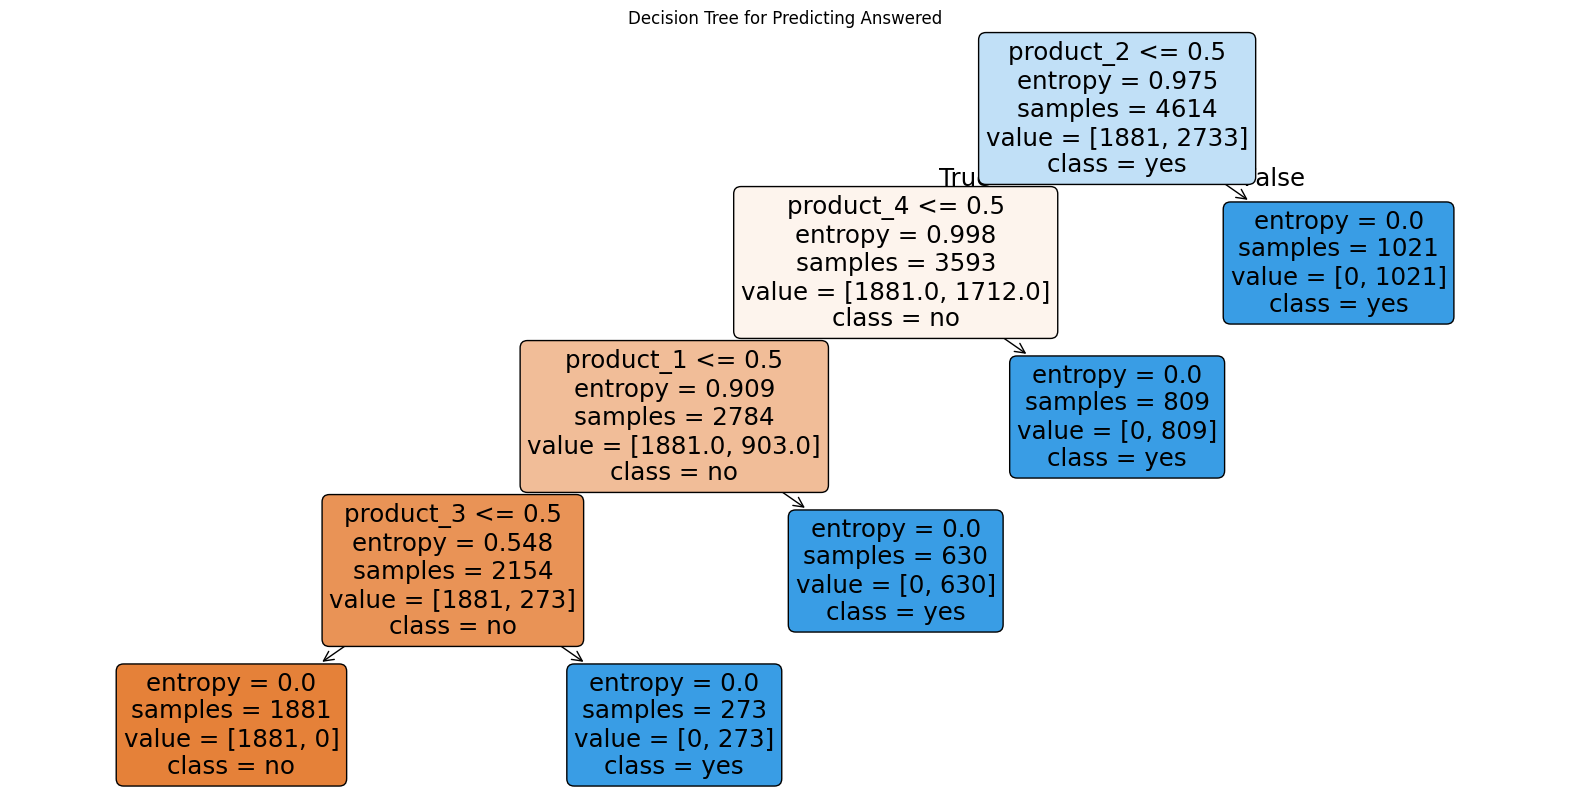

In [64]:
# 🔧 4.3.2. display (visualize) the Tree
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X_encoded.columns, class_names=['no', 'yes'], filled=True, rounded=True)
plt.title('Decision Tree for Predicting Answered')
plt.show()

### **4.4. What is the accuracy?**

This should be better than the base probability, or you have failed in your objective

In [75]:
# 🔧 4.4. Calculate the probability for your tree
from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 1.00


### **4.5: Create a confusion matrix**

This will show false positives, true positives, false negatives and true negatives.

In [76]:
# 🔧 4.5.1 Create a basic confusion matrix using sklearn's functions
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=['no','yes'])
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[ 807    0]
 [   0 1171]]


Create a more visual, interpretable version of the matrix

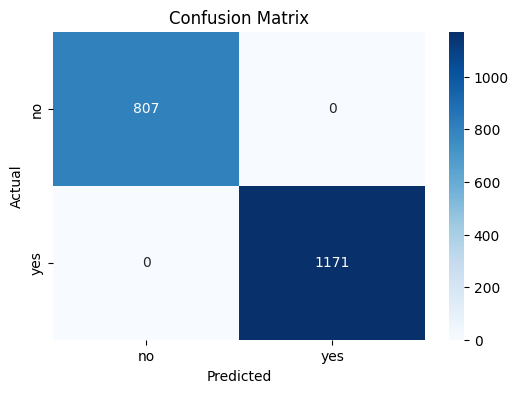

In [77]:
# 🔧 4.5.2. Create a beautiful matrix; hint - try using Seaborn Heatmap
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['no','yes'], yticklabels=['no','yes'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

## **Step 5: Evaluate the Model**

Earlier, we calculated the technical accuracy of the model. It is also important to evaluate the model economically. What would be the economic benefit of using this model for the business?

**Assumptions**

One of the simplifying assumptions we will make in this project is that all the customers who answer the phone will purchase a product. (This assumption is actually verified by the data.) To model `answered` as thew target in this case is therefore equivalent to modeling `purchased` as the target.

There are costs and benefits in this case. We will assume that customers purchase a product for 100 dollars. This was the average cost of AdviseInvest products, according to the Director of Sales.  Also, as we learned in the interview, the agent time to make the sale is worth 25 dollars. Profit would therefore be \$75 dollars for an answered call and a purchase. In sum:

**Benefit**: True positive. The customer is predicted to answer, does answer, and purchases a product for 100 dollars for a profit of 100 - 25 = 75.

**Cost**: False positive. The customer is predicted to answer, but does not answer, so there is a loss of 25. (We assume the agent cannot schedule another call at the last minute, or spends the entire time slot trying to make the call.)

When you create a calculation you can use:
- True answered * 75 -> These people purchased
- False answered * 25 -> You can't schedule another call

For this exercise, we propose that customers who are not predicted to answer will not be called, so there would be no benefits and no costs for them.  

### **5.1. Calculate the Profit Using the Model**

In [79]:
# 🔧 5.1. Write a calcuation for the profit from your model
# Define profits and costs
profit_per_tp = 75
cost_per_fp = 25

# Extract counts from the confusion matrix
tp = 1171
fp = 0

# Total profit using the model
total_profit_model = (tp * profit_per_tp) - (fp * cost_per_fp)
print(f"Profit using the decision tree model: ${total_profit_model}")

Profit using the decision tree model: $87825


### **5.2 Compare to the Default Profit**

How much profit (revenue - costs) could be expected if all customers are called? We can consider this a baseline case for profit since it does not require a model.

In other words, to calculate profit in this baseline scenario treat the customers who answer as true positives, treat the customers who do not answer as false positives.

In [80]:
# 🔧 5.2. Write a calculation for the overall profit without using the model (default)
# Baseline profit
tp_baseline = 1171
fp_baseline = 807

total_profit_baseline = (tp_baseline * profit_per_tp) - (fp_baseline * cost_per_fp)
print(f"Profit without using the model (baseline): ${total_profit_baseline}")

Profit without using the model (baseline): $67650


### **Improve the model, and apply the best model to new (truly unseen) Data**

### **5.3 Tune the Model**

5.3.1. Create a new tree by adjusting the size or shape of the tree,

5.3.2. then test the accuracy

Keep changing these parameters until you end up with a tree with accuracy that is better than the initial model

In [81]:
# 🔧 5.3.1. Create a new version of the tree with new parameters
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Example: New tree with tuned parameters
clf_tuned = DecisionTreeClassifier(
    max_depth=5,          # limit tree depth
    min_samples_split=10, # require at least 10 samples to split
    min_samples_leaf=5,   # require at least 5 samples in leaf nodes
    random_state=42
)

# Fit the model on training data
clf_tuned.fit(X_train, y_train)

# Predict on test set
y_pred_tuned = clf_tuned.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Tuned Model Accuracy: {accuracy:.4f}")
print(classification_report(y_test, y_pred_tuned))


Tuned Model Accuracy: 1.0000
              precision    recall  f1-score   support

          no       1.00      1.00      1.00       807
         yes       1.00      1.00      1.00      1171

    accuracy                           1.00      1978
   macro avg       1.00      1.00      1.00      1978
weighted avg       1.00      1.00      1.00      1978



In [82]:
# 🔧 5.3.2. Calculate evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

y_pred = clf_tuned.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print(class_report)

if len(set(y_test)) == 2:
    y_proba = clf_tuned.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {auc:.4f}")


Accuracy: 1.0000
[[ 807    0]
 [   0 1171]]
              precision    recall  f1-score   support

          no       1.00      1.00      1.00       807
         yes       1.00      1.00      1.00      1171

    accuracy                           1.00      1978
   macro avg       1.00      1.00      1.00      1978
weighted avg       1.00      1.00      1.00      1978

ROC AUC Score: 1.0000


### **5.4 Apply the Model to New Customers**

5.4.1. Import the "adviseinvest_new_customer_data.csv" file

5.4.2. Using the tree model, predict the target variable for each customer by feeding the new customer data into the model

In [83]:
# 🔧 5.4.1. Import new customer data into a new data frame
# Load new customer data
new_customers = pd.read_csv("adviseinvest_new_customer_data.csv")

# Preview the data
new_customers.head()

,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,customer_id
0,30010,0,40,2,1,1,0,0,1,0,3,0,H1597
1,30510,0,54,2,1,0,1,0,0,0,2,0,P1446
2,12880,0,48,2,2,0,1,0,0,1,4,0,E1492
3,15530,0,44,2,1,0,1,0,0,0,2,0,W5143
4,46230,0,40,3,1,0,1,0,3,1,2,0,W4927


In [87]:
# 🔧 5.4.2. Apply the above best model, Predict the number of customers who will be yes/no for the target variable
# Drop customer_id column if it's not part of the model features
X_new = new_customers.drop(columns=["customer_id"])

# Apply the same one-hot encoding as was applied to the training data
X_new_encoded = pd.get_dummies(X_new, drop_first=True)

# Reindex the new data columns to match the training data columns, filling missing with 0
# This is crucial if the new data has different categories or missing columns compared to training
X_new_encoded = X_new_encoded.reindex(columns=X_train.columns, fill_value=0)


# Predict using the tuned tree model
new_predictions = clf_tuned.predict(X_new_encoded)

# Count the number of 'yes' and 'no' predictions
prediction_counts = pd.Series(new_predictions).value_counts()
print(prediction_counts)

no    1000
Name: count, dtype: int64


## **Task 6: Conclusion**

### ✍️ Please answer the following:

6.1. Did we improve our profit using the model?

6.2: How else could the model be utilized by the business?






### ✍️ Your Response:

6.1. Write your conclusion notes below:
 Yes, we improved profit using the decision tree model. Profit with model: $87,825. Profit without model (baseline): $67,650. Thus an improvement. By predicting which customers are likely to answer the call, the company avoids wasting sales rep time on customers unlikely to respond, increasing efficiency and net profit by $20,175.




6.2. Write your recommendations below:
The model can be leveraged by the business in several ways beyond simply predicting which customers will answer calls. By identifying likely responders, AdviseInvest can optimize sales scheduling, ensuring that sales reps are assigned efficiently and minimizing idle time. The model can also guide targeted marketing efforts and follow-up communications toward customers most likely to engage, increasing overall conversion rates. Additionally, the predictions can support resource planning by anticipating call volumes and informing staffing decisions. Beyond answering calls, the model could be extended to predict which financial plans a customer is most likely to purchase, enabling personalized upselling strategies and maximizing revenue per interaction. Regularly updating the model with new customer data will allow the company to capture shifts in customer behavior and continuously improve sales effectiveness.


## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Save the file with your last name and first name as shown below (see detailed instructions in Lab 1 on how to do this).
- Submit the assignment as an **HTML file** on Canvas


In [74]:
!jupyter nbconvert --to html "assignment_10_LoreSpencer.ipynb"

[NbConvertApp] WARNING | pattern 'assignment_10_LastnameFirstname.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes